## Stemming tekstu

### Przygotowanie środowiska

In [40]:
import re
import requests
from nltk.stem.snowball import SnowballStemmer
import matplotlib.pyplot as plt

### Przygotowanie tekstu

In [41]:
tekst = ["@ayyytylerb 4+8=12<24>35 that is 3/6 7^5 ~so true drink lots of coffee|tea",
"RT @bryzy_brib: Senior March tmw morning at 7:25 A.M. in the SENIOR lot. Get up early, make yo coffee/breakfast, cus this will only happen ?",
"If you believe in #gunsense tomorrow would be a very good day to have your coffee any place BUT @Starbucks Guns+Coffee=#nosense @MomsDemand",
"My cute coffee mug - 5.8$. http://t.co/2udvMU6XIG",
"RT @slaredo21: I wish we had Starbucks here... Cause coffee dates in the morning sound perff!",
"Does anyone ever get a cup of coffee before a cocktail??",
"I like my coffee like I like my women...black, bitter, and preferably fair trade. I love #Archer",
"@dreamwwediva ya didn't have coffee did ya?",
"RT @iDougherty42: I just want\r\n some coffee.",
"RT @Dorkv76: I can't care before coffee.",
"No lie I wouldn't mind coming home smelling like coffee",
"RT @JonasWorldFeed: Play Ping Pong with Joe. Take a tour of the stage with Nick. Have coffee with Kevin. Charity auction: https://t.co/VTkK?",
"Have I ever told any of you that Tate Donovan bought my stepmom coffee?",
"RT @JonasWorldFeed: Play Ping Pong with Joe. Take a tour of the stage with Nick. Have coffee with Kevin. Charity auction: https://t.co/VTkK?",
"@HeatherWhaley I was about 2 joke it takes 2 hands to hold hot coffee...then I read headline! #Don'tDrinkNShoot",
"RT @MoveTheSticks: Charlie Whitehurst looks like he should be working \nat a coffee shop in Portland or hosting a renovation show on HGTV.",
"Coffee always makes everything better.",
"RT @AdelaideReview: Food For Thought: @Annabelleats shares a delicious Venison and Porcini Mushroom Pie Recipe. http://t.co/N8O7vqFKWN http?",
"RT @LittleMelss: lmfao!!!@bryanlaca: nahhh Melanie u is fa sho like an ummm a Coffee table ;) ) yeeeee lmaoo",
"I wonder if Christian Colon will get a cup of coffee once the rosters\r expand to 40 man in September. Really nothing to lose by doing so."]

#### 1. Normalizacja

In [42]:
import re

def czysc_tekst(tekst):
    
    temp = re.sub("\s{2,}", " ", tekst)
    temp = re.sub("(\r\n|\r|\n)", " ", temp) 
    temp = temp.lower() 
    temp = re.sub("rt", "", temp) 
    temp = re.sub("&amp", "", temp) 
    temp = re.sub("#[a-z,A-Z]*", "", temp)
    temp = re.sub("@\w+", "", temp) 
    temp = re.sub("(f|ht)(tp)([^ ]*)", "", temp) 
    temp = re.sub("http(s?)([^ ]*)", "", temp)
    temp = re.sub("[!\"#$%&'()*+,-./:;<=>?@[\]^_`{|}~]", " ", temp) 
    temp = re.sub("\d", "", temp) 
    temp = re.sub("\s{2,}", " ", temp) 
    temp = temp.strip()
    return temp

In [43]:
czysty = [czysc_tekst(el) for el in tekst]
czysty

['that is so true drink lots of coffee tea',
 'senior march tmw morning at a m in the senior lot get up early make yo coffee breakfast cus this will only happen',
 'if you believe in tomorrow would be a very good day to have your coffee any place but guns coffee',
 'my cute coffee mug',
 'i wish we had starbucks here cause coffee dates in the morning sound perff',
 'does anyone ever get a cup of coffee before a cocktail',
 'i like my coffee like i like my women black bitter and preferably fair trade i love',
 'ya didn t have coffee did ya',
 'i just want some coffee',
 'i can t care before coffee',
 'no lie i wouldn t mind coming home smelling like coffee',
 'play ping pong with joe take a tour of the stage with nick have coffee with kevin charity auction',
 'have i ever told any of you that tate donovan bought my stepmom coffee',
 'play ping pong with joe take a tour of the stage with nick have coffee with kevin charity auction',
 'i was about joke it takes hands to hold hot coffee th

Usunięcie duplikatów

In [44]:
czysty_set = list(set(czysty))
czysty_set

['i wish we had starbucks here cause coffee dates in the morning sound perff',
 'that is so true drink lots of coffee tea',
 'if you believe in tomorrow would be a very good day to have your coffee any place but guns coffee',
 'i can t care before coffee',
 'no lie i wouldn t mind coming home smelling like coffee',
 'senior march tmw morning at a m in the senior lot get up early make yo coffee breakfast cus this will only happen',
 'play ping pong with joe take a tour of the stage with nick have coffee with kevin charity auction',
 'food for thought shares a delicious venison and porcini mushroom pie recipe',
 'i like my coffee like i like my women black bitter and preferably fair trade i love',
 'does anyone ever get a cup of coffee before a cocktail',
 'have i ever told any of you that tate donovan bought my stepmom coffee',
 'my cute coffee mug',
 'coffee always makes everything better',
 'charlie whitehurst looks like he should be working at a coffee shop in poland or hosting a ren

In [45]:
czysty_dict = list(dict.fromkeys(czysty))
czysty_dict

['that is so true drink lots of coffee tea',
 'senior march tmw morning at a m in the senior lot get up early make yo coffee breakfast cus this will only happen',
 'if you believe in tomorrow would be a very good day to have your coffee any place but guns coffee',
 'my cute coffee mug',
 'i wish we had starbucks here cause coffee dates in the morning sound perff',
 'does anyone ever get a cup of coffee before a cocktail',
 'i like my coffee like i like my women black bitter and preferably fair trade i love',
 'ya didn t have coffee did ya',
 'i just want some coffee',
 'i can t care before coffee',
 'no lie i wouldn t mind coming home smelling like coffee',
 'play ping pong with joe take a tour of the stage with nick have coffee with kevin charity auction',
 'have i ever told any of you that tate donovan bought my stepmom coffee',
 'i was about joke it takes hands to hold hot coffee then i read headline tdrinknshoot',
 'charlie whitehurst looks like he should be working at a coffee sho

In [46]:
# czysty_set == czysty_dict

In [47]:
czysty = list(dict.fromkeys(czysty))

#### 2. Tokenizacja

In [48]:
tokeny = [re.split("\s", el) for el in czysty]
# tokeny

#### 3. Stop lista

In [49]:
stopwords = ["a", "able", "about", "across", "after", "all", "almost", "also", "am", "among", "an", "and", "any", "are", "as", "at", "be", "because", "been", "but", "by", "can", "cannot", "could", "dear", "did", "do", "does", "either", "else", "ever", "every", "for", "from", "get", "got", "had", "has", "have", "he", "her", "hers", "him", "his", "how", "however", "i", "if", "in", "into", "is", "it", "its", "just", "least", "let", "like", "likely", "may", "me", "might", "most", "must", "my", "neither", "no", "nor", "not", "of", "off", "often", "on", "only", "or", "other", "our", "own", "rather", "said", "say", "says", "she", "should", "since", "so", "some", "than", "that", "the", "their", "them", "then", "there", "these", "they", "this", "tis", "to", "too", "twas", "us", "wants", "was", "we", "were", "what", "when", "where", "which", "while", "who", "whom", "why", "will", "with", "would", "yet", "you", "your"]

In [52]:
sciezka = "https://www.textfixer.com/tutorials/common-english-words.txt"

response = requests.get(sciezka)
stopwords = response.text.split(",")
stopwords = stopwords + ["ya", "yeeeee", "yo", "ummm", "coffee", "coffe", "t"] 
# stopwords

In [53]:
termy = [[t for t in el if t not in stopwords] for el in tokeny]
termy

[['true', 'drink', 'lots', 'tea'],
 ['senior',
  'march',
  'tmw',
  'morning',
  'm',
  'senior',
  'lot',
  'up',
  'early',
  'make',
  'breakfast',
  'cus',
  'happen'],
 ['believe', 'tomorrow', 'very', 'good', 'day', 'place', 'guns'],
 ['cute', 'mug'],
 ['wish', 'starbucks', 'here', 'cause', 'dates', 'morning', 'sound', 'perff'],
 ['anyone', 'cup', 'before', 'cocktail'],
 ['women', 'black', 'bitter', 'preferably', 'fair', 'trade', 'love'],
 ['didn'],
 ['want'],
 ['care', 'before'],
 ['lie', 'wouldn', 'mind', 'coming', 'home', 'smelling'],
 ['play',
  'ping',
  'pong',
  'joe',
  'take',
  'tour',
  'stage',
  'nick',
  'kevin',
  'charity',
  'auction'],
 ['told', 'tate', 'donovan', 'bought', 'stepmom'],
 ['joke', 'takes', 'hands', 'hold', 'hot', 'read', 'headline', 'tdrinknshoot'],
 ['charlie',
  'whitehurst',
  'looks',
  'working',
  'shop',
  'poland',
  'hosting',
  'renovation',
  'show',
  'hgtv'],
 ['always', 'makes', 'everything', 'better'],
 ['food',
  'thought',
  'shar

#### 4. Stemming

In [54]:
print(" ".join(SnowballStemmer.languages))

stemmer = SnowballStemmer("english")
print(stemmer.stem("running"))
# print(stemmer.stem(["running", "morning"]))

arabic danish dutch english finnish french german hungarian italian norwegian porter portuguese romanian russian spanish swedish
run


In [55]:
termy_stem = [[stemmer.stem(t) for t in el] for el in termy]
termy_stem

[['true', 'drink', 'lot', 'tea'],
 ['senior',
  'march',
  'tmw',
  'morn',
  'm',
  'senior',
  'lot',
  'up',
  'earli',
  'make',
  'breakfast',
  'cus',
  'happen'],
 ['believ', 'tomorrow', 'veri', 'good', 'day', 'place', 'gun'],
 ['cute', 'mug'],
 ['wish', 'starbuck', 'here', 'caus', 'date', 'morn', 'sound', 'perff'],
 ['anyon', 'cup', 'befor', 'cocktail'],
 ['women', 'black', 'bitter', 'prefer', 'fair', 'trade', 'love'],
 ['didn'],
 ['want'],
 ['care', 'befor'],
 ['lie', 'wouldn', 'mind', 'come', 'home', 'smell'],
 ['play',
  'ping',
  'pong',
  'joe',
  'take',
  'tour',
  'stage',
  'nick',
  'kevin',
  'chariti',
  'auction'],
 ['told', 'tate', 'donovan', 'bought', 'stepmom'],
 ['joke', 'take', 'hand', 'hold', 'hot', 'read', 'headlin', 'tdrinknshoot'],
 ['charli',
  'whitehurst',
  'look',
  'work',
  'shop',
  'poland',
  'host',
  'renov',
  'show',
  'hgtv'],
 ['alway', 'make', 'everyth', 'better'],
 ['food',
  'thought',
  'share',
  'delici',
  'venison',
  'porcini',
  '

#### 5. Zliczenie wystąpień

In [56]:
termy = [term for el in termy_stem for term in el]
unikaty = list(set(termy))

print(f'Wszystkich termów jest {len(termy)} ale unikatowych jest {len(unikaty)}')
print(unikaty)

Wszystkich termów jest 123 ale unikatowych jest 116
['noth', 'recip', 'man', 'told', 'tdrinknshoot', 'work', 'anyon', 'trade', 'share', 'stage', 'make', 'hot', 'day', 'auction', 'look', 'tour', 'renov', 'care', 'whitehurst', 'nahhh', 'melani', 'nick', 'tmw', 'show', 'kevin', 'happen', 'good', 'home', 'wonder', 'love', 'prefer', 'poland', 'wish', 'christian', 'shop', 'expand', 'everyth', 'tea', 'm', 'breakfast', 'food', 'tomorrow', 'befor', 'thought', 'roster', 'drink', 'mug', 'septemb', 'perff', 'u', 'do', 'joke', 'hgtv', 'mushroom', 'host', 'caus', 'lie', 'joe', 'stepmom', 'gun', 'bitter', 'women', 'true', 'wouldn', 'starbuck', 'date', 'take', 'hand', 'chariti', 'cus', 'lmfao', 'lose', 'cup', 'delici', 'pong', 'fa', 'lot', 'charli', 'sho', 'here', 'didn', 'veri', 'tate', 'porcini', 'colon', 'headlin', 'donovan', 'play', 'lmaoo', 'better', 'cute', 'realli', 'earli', 'believ', 'mind', 'tabl', 'venison', 'cocktail', 'read', 'pie', 'fair', 'march', 'alway', 'want', 'senior', 'place', 'up'

In [57]:
bow = {unikat: termy.count(unikat) for unikat in unikaty}

In [58]:
bow_naj = {unikat: liczba for unikat, liczba in bow.items() if liczba >= 2}

bow_naj_sort = {unikat: liczba for unikat, liczba in sorted(bow_naj.items(), key=lambda el: el[1])} #, reverse = True
bow_naj_sort

{'make': 2, 'befor': 2, 'take': 2, 'cup': 2, 'lot': 2, 'senior': 2, 'morn': 2}

#### 6. Wizualizacja

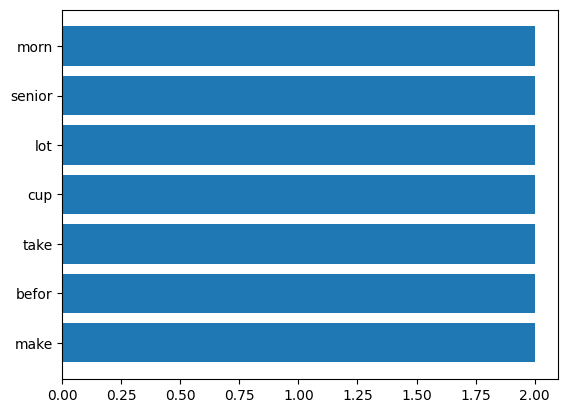

In [59]:
import matplotlib.pyplot as plt

plt.barh(range(len(bow_naj_sort)), bow_naj_sort.values(), align='center')
plt.yticks(range(len(bow_naj_sort)), list(bow_naj_sort.keys()))

plt.show()

### Zadanie domowe

#### Zadanie 1.

Znajdź oraz rozpoznaj bibliotekę (`Python`) pozwalającą na utworzenie chmury słów w `Python`.

#### Zadanie 2.

Przygotuj chmurę słów (lub wykres kolumnowy dla 50 najczęściej używanych słów) w oparciu o *bag-of-words*. Dla pozyskanych przez Ciebie dokumentów (w języku angielskim). Korpus ma odzwierciedlać pewną dychotomię - konflikt, dyskusję dwóch stron pewnego zjawiska np: zmian klimatycznych, lockdownu, ulubionego sportu (rugby vs. piłka nożna). Mogą to być: teksty tweetów na wybrane tematy (min 1000 tweetów dla każdej strony); dwóch grup artykułów (po 3-5 dla każdej strony, każdy ponad 2000 wyrazów); wypowiedzi dwóch ekspertów czy polityków (po 3-5 dla każdej strony, każdy ponad 2000 wyrazów).

Analizę wykonaj w dwóch wersjach:

1. dwa teksty traktowane są osobno - jako dwa osobne korpusy, przygotuj dwie wizualizacje dla każdej strony osobno.
2. dwa teksty traktowane są jako jeden i wykonaj wizualizację prezentującą:

    - termów charakterystycznych dla każdej ze stron (termy pojawiające się w wypowiedziach jednej strony ale nie pojawiające się w wypowiedziach drugiej strony),
    - termów wspólnych dla dwóch stron (termy pojawiające się w wypowiedziach jednej i drugiej strony jednocześnie).